# Personal Spotify Analysis

I chose to do this anaylsis because I wanted to learn more about utilizing and troubleshooting APIs and working with JSON files. Additionally, I felt looking at my personal spotify account would allow for some interesting analysis to see the evolution of my muscial tastes through time.

In [58]:
import sys
import spotipy
import spotipy.util as util
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.cluster import SpectralClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

### Authentication of my account

Through spotify's web developer portal, it is very easy to get quickly authenticated for building both commercial and non-commercial apps. Upon being approved, you are generated an ID along with Secret ID. I saved these keys through the command line so they are not referenced here.

In [2]:
username = sys.argv[1]

In [8]:
token = util.prompt_for_user_token(username,scope = 'user-top-read')



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=96b658e2c3944ac2bcc51b53b164032e&response_type=code&redirect_uri=http%3A%2F%2Fgoogle.com%2F&scope=user-top-read in your browser


Enter the URL you were redirected to: https://www.google.com/?code=AQC9pmSEZEDvHbz1nJUkJstxj-rXiF0zdZfwmMhniku5B4aKuLN7hBM_XJpCVaRQq-n3a78SGgLQPx-n3mvQydR_fnY3g9DeT7DJHWQwbtbbOjPU47QJcmhRdUJ6snaWiCPauDOvkdJI-i2H4LHCq4BszjTfsi-ZXb8NsfCs1RneNbYZnAB9qL7aZwKAYyeiTvUGyHUOTg




In [94]:
sp = spotipy.Spotify(auth=token)

### My saved albums with Clustering Analysis

In [95]:
artist_dic = {}
genre_dic = defaultdict(int)
offset = [0,20,40,60,80,100,120,140,160,180]

In [96]:
for offset_val in offset:
    artists_med = sp.current_user_top_artists(offset=offset_val)
    #artists_med['items'][0]['name'] = artists_med['items'][0]['id']
    for i in range(len(artists_med['items'])):
        for item in artists_med['items'][i]['genres']:
            genre_dic[item] += 1

I now have a dictionary full of all the different genres of my top 200 artists. I'd like to take a look at these and group similar genres so I can get a more broad understanding of the overarching genres I'm listening to. I'll preform a TFIDF weighting to vectorize the genres to allow for comparison. Due to the fact that many/all of these genres are only 1-3 words, this isn't going to be the most effective measure for comparing the similarity or using TF-IDF. That being said, from glancing at the genres, it did appear that many of the 2 and 3 word genres had words like 'pop' or 'country' or 'rock' that could be tied to other words and could match well.

In [97]:
corpus = genre_dic.keys()                                                                                                       
vect = TfidfVectorizer(min_df=1)            
tfidf = vect.fit_transform(corpus)
pairwise_similarity = np.asmatrix((tfidf * tfidf.T).toarray())

Now that I have the matrix of TFIDF scores, I can doing clustering to see what the trends are behind the data. I'm choosing to only look at 3 different clusters for the time being just because I don't believe I have that wide a variety 

In [103]:
mapping = SpectralClustering(3).fit_predict(pairwise_similarity)

In [104]:
clusterings = pd.DataFrame(data = {'genre': list(genre_dic.keys()), 'mapping': mapping})

In [109]:
concat_genre_zero = ' '.join([f for f in clusterings[clusterings['mapping'] == 0]['genre']])
concat_genre_one = ' '.join([f for f in clusterings[clusterings['mapping'] == 1]['genre']])
concat_genre_two = ' '.join([f for f in clusterings[clusterings['mapping'] == 2]['genre']])

The first group appears to be a rock, indie, alternative, garage, genre. It has a signficantly smaller population than the other two groups which makes sense. I don't listen to a ton of rock and alternative music but they often times do share a word like 'rock'

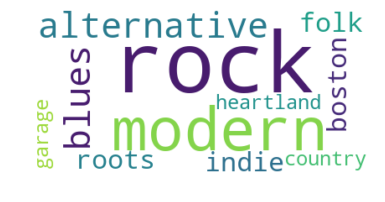

In [120]:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(concat_genre_zero)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This is most expansive group in the cluster and contains my favorite genres. I listen to a lot of folk, country, americana and this group encompasses that a lot more.

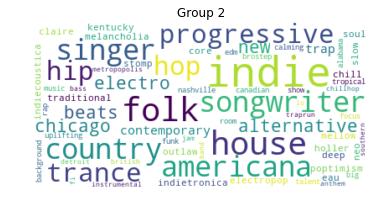

In [125]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(concat_genre_one)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Group 2')
plt.show()

I was expecting there to be one group that felt out of place and would not have a consistent theme. Due to the data I used only including at most 3 words, it was inevitable. It makes sense that all the one word genres 'pop', 'rap', 'dance', etc.. got paired together and that is this grouping

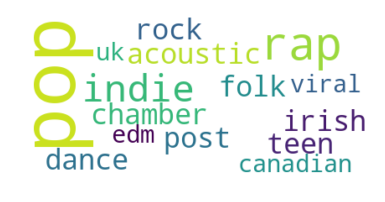

In [115]:
wordcloud = WordCloud(max_font_size=90, max_words=100, background_color="white").generate(concat_genre_two)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Recently Played

In [127]:
token = util.prompt_for_user_token(username,scope = 'user-read-recently-played')
sp1 = spotipy.Spotify(auth=token)



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=96b658e2c3944ac2bcc51b53b164032e&response_type=code&redirect_uri=http%3A%2F%2Fgoogle.com%2F&scope=user-read-recently-played in your browser


Enter the URL you were redirected to: https://www.google.com/?code=AQCOatMjXWZfRRqMMLT_sKmr-v16c7nM71xyx2x6F4O-WVJkjzIYfbvuP-tQKjxKfw6njHyjAHf79mh7xQ_8vm0NVSym6qO_eTUDERpuGMr35DLZJHiq9hZkjR_1ZOg2z86RDCdZegrjCcf84wpPgKXf5AdditXpjxWxiZwkFARxfnP_vGVNrtRJMk68dmJiR7Rx0dx_FUTfvRobGCf2LxirTA




In [128]:
recently_played = sp1.current_user_recently_played(limit = 50)

I'm interested in taking a look into what I've been listening to recently. Through spotify's API, I can look at the past 50 tracks I've listened to. In order to categorize it better, I've stored it in a dictionary.

In [129]:
played_time = [recently_played['items'][i]['played_at'] for i in range(len(recently_played['items']))]

In [130]:
from collections import defaultdict
recent_artist_dic = defaultdict(int)

In [131]:
for i in range(len(recently_played['items'])):
    recent_artist_dic[recently_played['items'][i]['track']['artists'][0]['name']] += 1

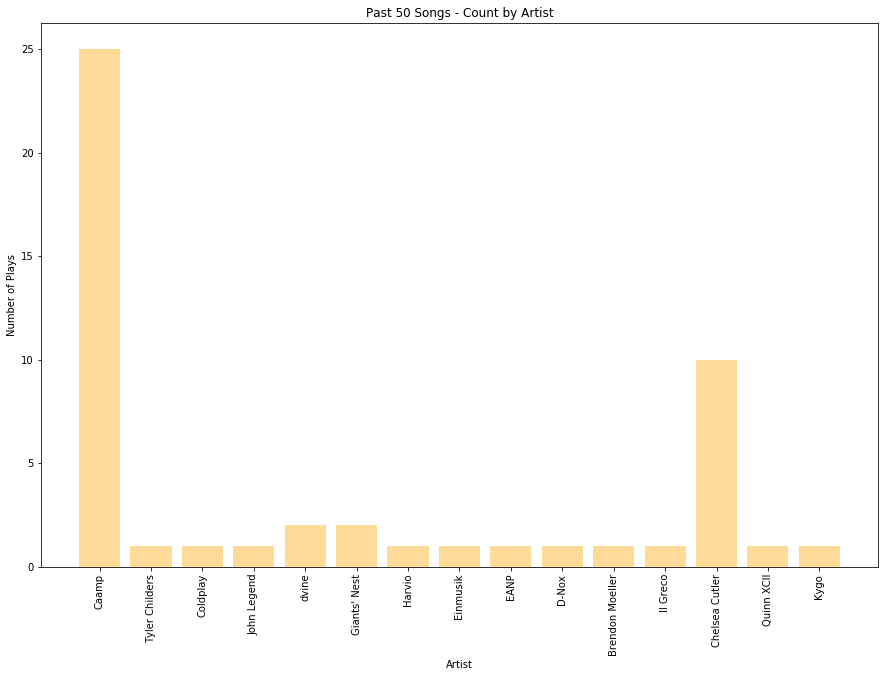

In [132]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.bar(recent_artist_dic.keys(),recent_artist_dic.values(), color='orange', alpha=0.4)
plt.title('Past 50 Songs - Count by Artist')
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Number of Plays')
plt.show()